# Captsone 1: Exercise 8.5.1:  Version 3

# Statistical Analysis

## Game plan

In this notebook, I am going to:

*   Separated non-categorical and categorical features, and for each type of feature:
*   Calculated correlation statistics, f-stats, and p-values for each feature
*   Visually inspected the high-correlated, statistically-significant features against sale price
*   Visualized the cross-correlations between such features
*   Selected top candidates i.e., high correlation with sale price, significant p-values and low correlation with other top candidates)
*   Previewed a linear regression combining top candidates

## History

* v1:  First draft.  Added conclusion
* v2:  Added round of analysis
* v3:  Cleaned up

## Set up

In [1]:
# Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
# Set default seaborn style
sns.set()

## Do more cleaning

Takeaway:

* I needed to do more cleaning 
* Replace nulls where NaN was really a category.  Aka, fill with 'No' or 'None' or 0
* Convert a number of categorical variables into ordinal numbers where there's ordering.  Aka, use numbers, rather than words, for a 5 point quality scale.
* I did this back in the wrangle notebook, saving it as clean v2.

## Collect the cleaned data

In [3]:
# Unpickle the dataframe 
df =  pd.read_pickle("../sb_cap1_data/df_cln_v3.pickle")

Note on file paths:
    
* Use double quotes
* .. means go up a directory from current directory


# 1:  Analysis of non-categorical independent and continuous dependent

Here, I am looking to understand which non-categorical variables:

* Have more explanatory power for SalePrice (aka, higher Pearson's r)
* Are part of statistically significant simple linear models (aka, low p-value)
* Look like they're linearly associated with SalePrice (without fully testing regression assumptions)
* Are less cross-correlated with each other

## Building block:  Get stats for one variable

In [4]:
# Pick a categorial variable - pretty much at random
# i = 'LotArea'
# print('Let\'s look at {}'.format(i))
# Check out the range
# df[i].describe()

In [5]:
# Note:  Pandas .corr() is great to Pearson's R
# But it's not clear how to get p-values
# corr_salesprice = pd.DataFrame(df.corr()['SalePrice'])
# corr_salesprice['LotArea']

In [6]:
# Use scipy's personr function
# Clearly gives both stat and p-value
# y = 'SalePrice'
# x = 'LotArea'
# corr = stats.pearsonr(df[x], df[y])
# corr

### Building block:  Get the stats for a small list of variables

In [7]:
# List my Y and X columns
# y = 'SalePrice'
# col_list = ['LotArea', 'OverallCond', 'FullBath']
    
## Calc the stats
# corr_t2 = []
# pvalues_t2 = []     
# for col in col_list:
#     corr = stats.pearsonr(df[col], df[y])
#     corr_t2.append(corr[0])
#     pvalues_t2.append(corr[1])

# Create a data frame of results
# df_cat_results = pd.DataFrame(list(zip(corr_t2, pvalues_t2)), columns =['r_squared', 'p_value'], index=col_list)
# # df_cat_results = df_cat_results.round({'r_squared':2, 'p_value':5})


# # Add column re rejecting null
# df_cat_results['rej_null'] = np.where(df_cat_results['p_value']<=.05, 'yes', 'no')

# # Sort results
# df_cat_results.sort_values(by='r_squared', ascending=False, inplace=True)


# # Print results
# df_cat_results

### Loop through the full list of columns

In [8]:
# Filter down to non-categorical columns
df_nocat = df.select_dtypes(include=['int64', 'float64'])
print('There are {} non-categorical columns, including SalePrice'.format(len(df_nocat.columns)))

There are 55 non-categorical columns, including SalePrice


In [9]:
# List my Y and X columns
y = 'SalePrice'
col_list = df_nocat.columns.tolist()
col_list.remove('SalePrice')

# Calc the stats
corr_t2 = []
pvalues_t2 = []     
for col in col_list:
    corr = stats.pearsonr(df[col], df[y])
    corr_t2.append(corr[0])
    pvalues_t2.append(corr[1])

# Create a data frame of results
df_nocat_results = pd.DataFrame(list(zip(corr_t2, pvalues_t2)), columns =['r_squared', 'p_value'], index=col_list)
df_nocat_results = df_nocat_results.round({'r_squared':3, 'p_value':6})


# Add column re rejecting null
df_nocat_results['rej_null'] = np.where(df_nocat_results['p_value']<=.05, 'yes', 'fail')

# Sort results
df_nocat_results.sort_values(by='r_squared', ascending=False, inplace=True)


# Print results
df_nocat_results

,r_squared,p_value,rej_null
OverallQual,0.791,0.000000,yes
GrLivArea,0.709,0.000000,yes
ExterQual,0.683,0.000000,yes
KitchenQual,0.660,0.000000,yes
GarageCars,0.640,0.000000,yes
GarageArea,0.623,0.000000,yes
TotalBsmtSF,0.614,0.000000,yes
1stFlrSF,0.606,0.000000,yes
BsmtQual,0.585,0.000000,yes
FullBath,0.561,0.000000,yes


### Identify top of mind variables

In [10]:
# ID my non categorical variables of interest
r_sq_cutoff = .3
df_nocat_interest = df_nocat_results[(df_nocat_results['r_squared']>=r_sq_cutoff) & (df_nocat_results['rej_null']=='yes')]
print('There are {} columns that meet my cutoff'.format(len(df_nocat_interest)))
df_nocat_interest

There are 24 columns that meet my cutoff


,r_squared,p_value,rej_null
OverallQual,0.791,0.0,yes
GrLivArea,0.709,0.0,yes
ExterQual,0.683,0.0,yes
KitchenQual,0.660,0.0,yes
GarageCars,0.640,0.0,yes
GarageArea,0.623,0.0,yes
TotalBsmtSF,0.614,0.0,yes
1stFlrSF,0.606,0.0,yes
BsmtQual,0.585,0.0,yes
FullBath,0.561,0.0,yes


### Inspect scatterplots

In [11]:
## Graph 1 
# fig, ax = plt.subplots(ncols=2)
# sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=ax[0])
# sns.regplot(x='GrLivArea', y='SalePrice', data=df, ax=ax[1])
# fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


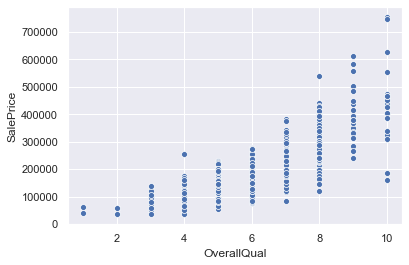

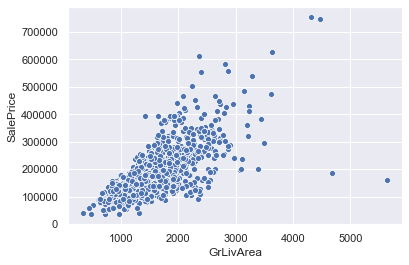

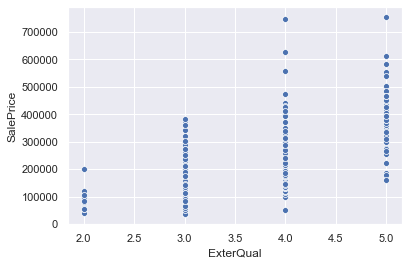

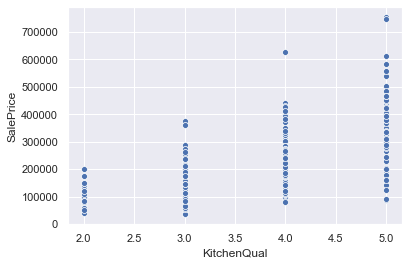

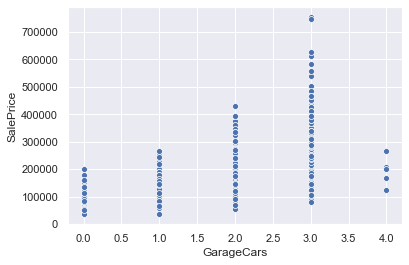

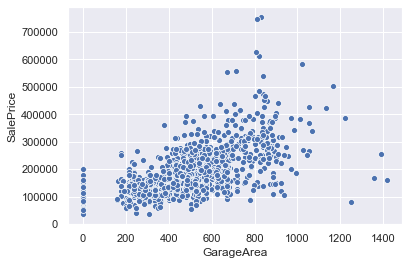

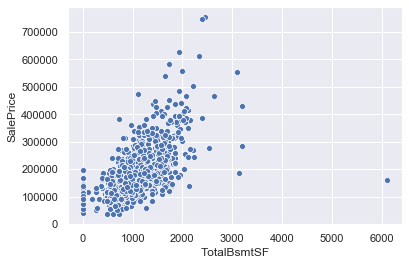

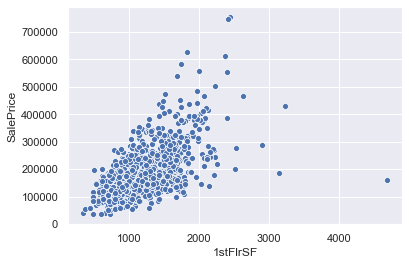

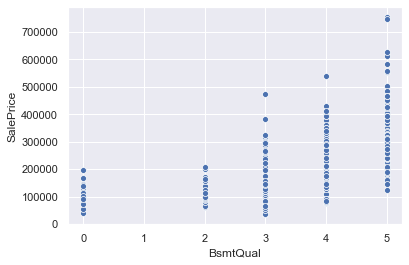

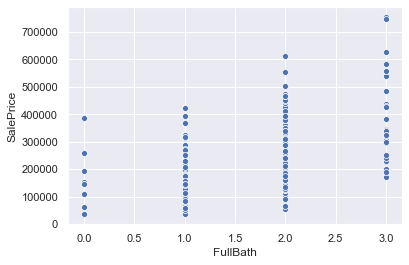

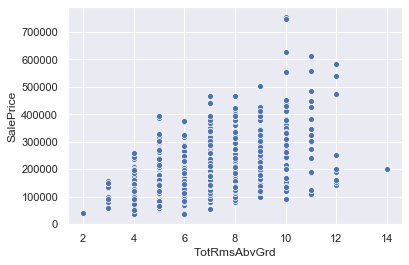

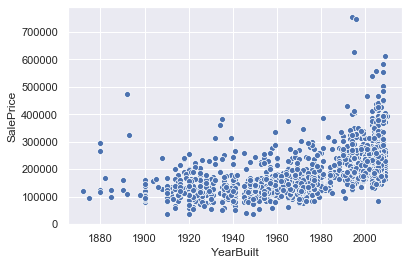

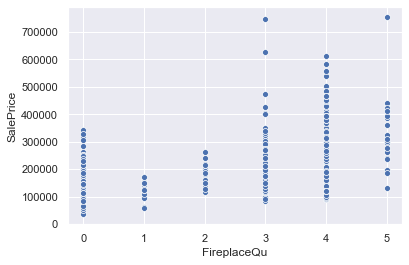

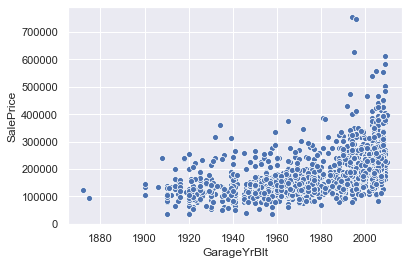

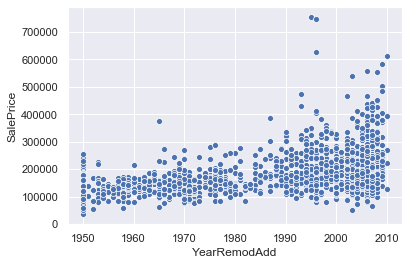

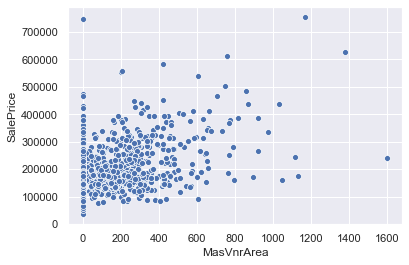

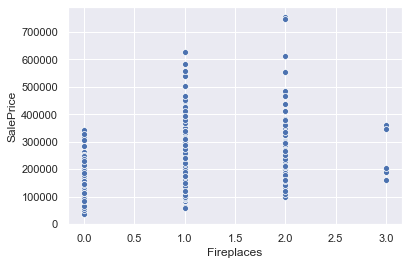

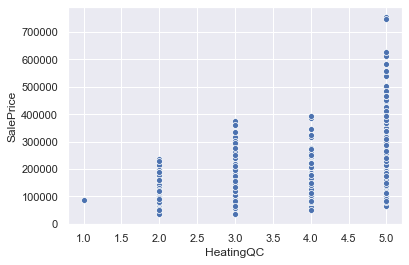

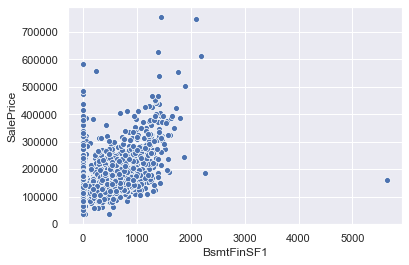

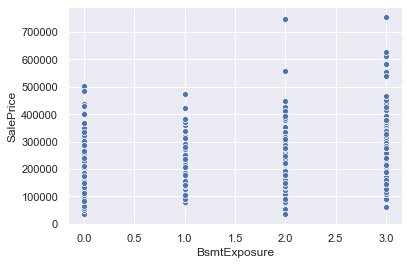

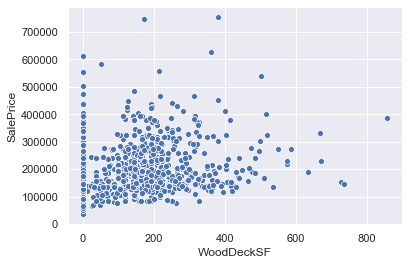

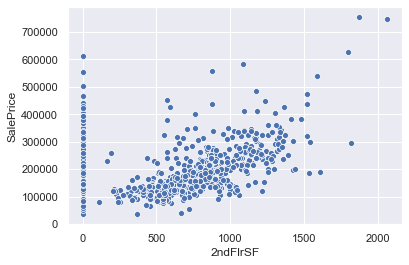

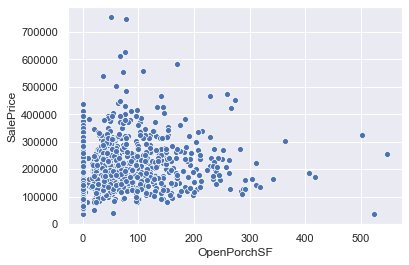

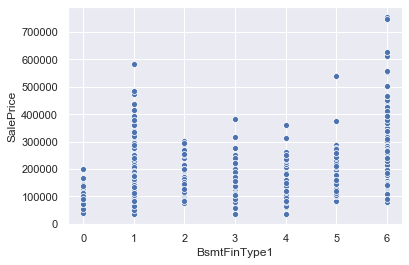

<Figure size 432x288 with 0 Axes>

In [12]:
x_col_list = df_nocat_interest.index.tolist()
y_col = 'SalePrice'
for x_col in x_col_list:
    ax = sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.figure()

### Look for high cross correlation

In [13]:
# Filter down the data set
x_col_list = df_nocat_interest.index.tolist()
# x_col_list.append('SalePrice')

col_list = x_col_list
df_nocat_interest_full = df[col_list]
# df_nocat_interest_full.head()

In [14]:
# Get the correlation numbers
df_nocat_interest_corr = df_nocat_interest_full.corr()
df_nocat_interest_corr = df_nocat_interest_corr.round(2)
# df_nocat_interest_corr = df_nocat_interest_corr.sort_values(by='SalePrice', ascending=False)
df_nocat_interest_corr

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,YearRemodAdd,MasVnrArea,Fireplaces,HeatingQC,BsmtFinSF1,BsmtExposure,WoodDeckSF,2ndFlrSF,OpenPorchSF,BsmtFinType1
OverallQual,1.00,0.59,0.73,0.67,0.60,0.56,0.54,0.48,0.63,0.55,...,0.55,0.41,0.40,0.46,0.24,0.27,0.24,0.30,0.31,0.23
GrLivArea,0.59,1.00,0.44,0.42,0.47,0.47,0.45,0.57,0.33,0.63,...,0.29,0.39,0.46,0.25,0.21,0.12,0.25,0.69,0.33,0.05
ExterQual,0.73,0.44,1.00,0.72,0.53,0.50,0.47,0.40,0.57,0.48,...,0.59,0.35,0.25,0.52,0.20,0.24,0.21,0.18,0.29,0.23
KitchenQual,0.67,0.42,0.72,1.00,0.51,0.49,0.43,0.39,0.51,0.43,...,0.63,0.28,0.26,0.50,0.23,0.24,0.22,0.17,0.26,0.25
GarageCars,0.60,0.47,0.53,0.51,1.00,0.88,0.43,0.44,0.45,0.47,...,0.42,0.36,0.30,0.33,0.22,0.25,0.23,0.18,0.21,0.19
GarageArea,0.56,0.47,0.50,0.49,0.88,1.00,0.49,0.49,0.41,0.41,...,0.37,0.37,0.27,0.30,0.30,0.25,0.22,0.14,0.24,0.21
TotalBsmtSF,0.54,0.45,0.47,0.43,0.43,0.49,1.00,0.82,0.56,0.32,...,0.29,0.36,0.34,0.27,0.52,0.33,0.23,-0.17,0.25,0.33
1stFlrSF,0.48,0.57,0.40,0.39,0.44,0.49,0.82,1.00,0.29,0.38,...,0.24,0.34,0.41,0.19,0.45,0.31,0.24,-0.20,0.21,0.21
BsmtQual,0.63,0.33,0.57,0.51,0.45,0.41,0.56,0.29,1.00,0.37,...,0.52,0.28,0.23,0.40,0.30,0.31,0.25,0.14,0.25,0.38
FullBath,0.55,0.63,0.48,0.43,0.47,0.41,0.32,0.38,0.37,1.00,...,0.44,0.27,0.24,0.33,0.06,0.10,0.19,0.42,0.26,0.06


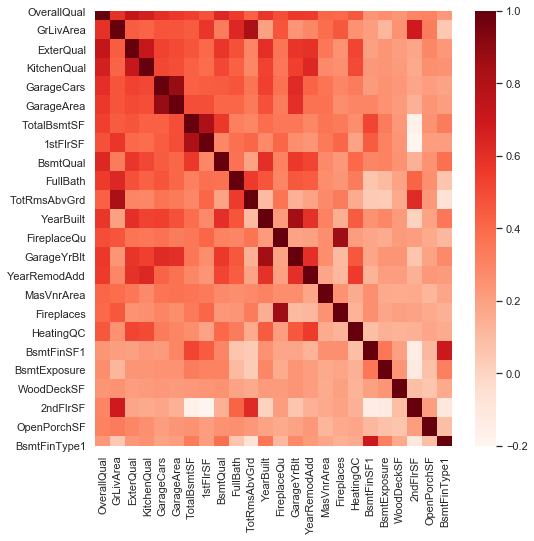

In [15]:
# Inspect a heatmap
g = plt.figure(figsize=(8, 8))
g = sns.heatmap(df_nocat_interest_corr, annot=False, cmap=plt.cm.Reds)

Takeaways:

The cross correlation is clear between

* various quality measures
* measures of footage and other measures of space (aka, garage area and number of cars)
* rooms and bathrooms

In [16]:
# # Simplify the table

# # Use cut to create some bins
# bins = [0, .5, .66, .83, .999, np.inf]
# names = [' ', 'M', 'L', 'XL', '   ']
# df_nocat_interest_corr_bins = pd.DataFrame()
# for col in col_list:
#     df_nocat_interest_corr_bins[col] = pd.cut(df_nocat_interest_corr[col], bins, labels=names)
# df_nocat_interest_corr_bins

In [17]:
# Prune list of those with high cross correlations

list_to_walk = df_nocat_interest_corr.index.to_list()
list_keep = [] #df_nocat_interest_corr.index.to_list()
list_skip = [] #['OverallQual']
cutoff_cross_corr = .5

for col in list_to_walk:
    if col in list_skip:
        continue
    else:
        list_keep.append(col)

    # Check if there are any lesser rows with cross correlation
    
    for row in list_to_walk:
        if col == row:
            continue
        if row in list_skip:
            continue
        if df_nocat_interest_corr[col][row] >= cutoff_cross_corr:
            list_skip.append(row)

In [18]:
df_nocat_interest_corr.loc[list_keep, list_keep]

,OverallQual,1stFlrSF,TotRmsAbvGrd,FireplaceQu,MasVnrArea,HeatingQC,BsmtFinSF1,BsmtExposure,WoodDeckSF,OpenPorchSF
OverallQual,1.00,0.48,0.43,0.49,0.41,0.46,0.24,0.27,0.24,0.31
1stFlrSF,0.48,1.00,0.41,0.41,0.34,0.19,0.45,0.31,0.24,0.21
TotRmsAbvGrd,0.43,0.41,1.00,0.36,0.28,0.16,0.04,0.03,0.17,0.23
FireplaceQu,0.49,0.41,0.36,1.00,0.27,0.21,0.18,0.16,0.22,0.17
MasVnrArea,0.41,0.34,0.28,0.27,1.00,0.16,0.26,0.17,0.16,0.12
HeatingQC,0.46,0.19,0.16,0.21,0.16,1.00,0.09,0.14,0.13,0.18
BsmtFinSF1,0.24,0.45,0.04,0.18,0.26,0.09,1.00,0.35,0.20,0.11
BsmtExposure,0.27,0.31,0.03,0.16,0.17,0.14,0.35,1.00,0.24,0.08
WoodDeckSF,0.24,0.24,0.17,0.22,0.16,0.13,0.20,0.24,1.00,0.06
OpenPorchSF,0.31,0.21,0.23,0.17,0.12,0.18,0.11,0.08,0.06,1.00


### State my final non-categorical variables

In [19]:
nocat_final_list = list_keep
nocat_final_list = pd.Series(nocat_final_list)
nocat_final_list

0     OverallQual
1        1stFlrSF
2    TotRmsAbvGrd
3     FireplaceQu
4      MasVnrArea
5       HeatingQC
6      BsmtFinSF1
7    BsmtExposure
8      WoodDeckSF
9     OpenPorchSF
dtype: object

### Skip:  Run a preview model with these variables

In [20]:
# results_4 = ols('SalePrice ~ OverallQual + GrLivArea + GarageCars + FullBath + FireplaceQu', data=df).fit()
# results_4.summary()

## Aside:  Does it make a difference if I drop outliers?

In [21]:
# List my outliers (1.5 IRQ above)
outliers = [441, 692, 770, 804, 899, 1047, 1170, 1183]

# Make a data frame without outliers
df_nocat_no_out = df.copy()

# Drop turning row labels into row indexes
for index in outliers:
    df_nocat_no_out.drop(index - 1, inplace=True)

Note:

* For some reason, I'm not able to drop row off my list of row labels.
* Is the issue that my row labels are composed on ints?
* Anyway, I can just drop by turning them into indicies

In [22]:
# Test:  How big is my data frame
print('After dropping 8 outliers, I have {} rows'.format(len(df_nocat_no_out)))

After dropping 8 outliers, I have 1452 rows


In [23]:
# Save the prior data frame that included outliers
df_nocat_yesout_results = df_nocat_results.copy()
df_nocat_yesout_results.sort_index(inplace=True)

In [24]:
# Connect old code to new dataframe
df_nocat = df_nocat_no_out.select_dtypes(include=['int64', 'float64'])
print('There are {} non-categorical columns'.format(len(df_nocat.columns)))

# List my Y and X columns
y = 'SalePrice'
col_list = df_nocat.columns.tolist()
col_list.remove('SalePrice')

# Calc the stats
corr_t2 = []
pvalues_t2 = []     
for col in col_list:
    corr = stats.pearsonr(df_nocat_no_out[col], df_nocat_no_out[y])
    corr_t2.append(corr[0])
    pvalues_t2.append(corr[1])

# Create a data frame of results
df_nocat_results = pd.DataFrame(list(zip(corr_t2, pvalues_t2)), columns =['r_squared', 'p_value'], index=col_list)
df_nocat_results = df_nocat_results.round({'r_squared':3, 'p_value':6})


# Add column re rejecting null
df_nocat_results['rej_null'] = np.where(df_nocat_results['p_value']<=.05, 'yes', 'no')


# Sort results
df_nocat_results.sort_index(inplace=True)
# df_nocat_results.sort_values(by='r_squared', ascending=False, inplace=True)

# Print results
df_nocat_results_out = df_nocat_results.copy()

df_nocat_results_out

There are 55 non-categorical columns


,r_squared,p_value,rej_null
1stFlrSF,0.607,0.000000,yes
2ndFlrSF,0.323,0.000000,yes
3SsnPorch,0.036,0.175071,no
BedroomAbvGr,0.173,0.000000,yes
BsmtExposure,0.362,0.000000,yes
BsmtFinSF1,0.384,0.000000,yes
BsmtFinSF2,-0.011,0.672102,no
BsmtFinType1,0.303,0.000000,yes
BsmtFinType2,-0.006,0.824394,no
BsmtFullBath,0.226,0.000000,yes


In [25]:
# Clean up the data frame
df_nocat_results_out.rename(columns={'r_squared': 'rsq_no_out'}, inplace=True)
df_nocat_results_out.drop(['p_value', 'rej_null'], axis=1, inplace=True)
df_nocat_results_out['rsq_yes_out'] = df_nocat_yesout_results['r_squared']
df_nocat_results_out['diff'] =  df_nocat_results_out['rsq_yes_out'] - df_nocat_results_out['rsq_no_out']
df_nocat_results_out.sort_values(by='diff', ascending=False, inplace=True)

In [26]:
df_nocat_results_out.describe()

,rsq_no_out,rsq_yes_out,diff
count,54.00000,54.000000,54.000000
mean,0.26550,0.265093,-0.000407
std,0.26762,0.266995,0.002492
min,-0.26700,-0.268000,-0.007000
25%,0.02325,0.024500,-0.001000
50%,0.26500,0.263500,0.000000
75%,0.50950,0.507750,0.000000
max,0.79200,0.791000,0.009000


In [27]:
df_nocat_results_out

,rsq_no_out,rsq_yes_out,diff
3SsnPorch,0.036,0.045,0.009
BsmtHalfBath,-0.024,-0.017,0.007
MoSold,0.043,0.046,0.003
MSSubClass,-0.087,-0.084,0.003
BsmtFinSF1,0.384,0.386,0.002
BsmtFinType1,0.303,0.305,0.002
BsmtFullBath,0.226,0.227,0.001
Functional,0.107,0.108,0.001
LotFrontage,0.209,0.210,0.001
ExterQual,0.682,0.683,0.001


Takeaway:

* There a small increase in correlation across non-categorical variables when you remove the outliers
* But always less than 1%

# 2:  Categorical independent and continuous dependent

Here, I'm looking to do a similar analysis for some categorical variables.

* Basically, I'm doing a one-way ANOVA analysis on the categorical variable
* H0 = the means are the sames
* H1 = there's a difference in the means
* Often, these tests use an F-statistic
* Plus, you want at least 3 levels of categorical independent variable
* You've got the typical assumptions of linear regression

### Building block:  Build a model for one categorical

In [28]:
# # Pick a categorial variable - pretty much at random
# i = 'HouseStyle'
# print('Let\'s look at {}'.format(i))

# # Check out the categories
# j = df[i].unique().tolist()
# print('This column has the following number of categories:  {}'.format(len(j)))
# print('This column has the following levels:  ', ', '.join(j))      

In [29]:
# # Get a model working for this single categorbical varaible 
# results = ols('SalePrice ~ C(HouseStyle)', data=df).fit()
# print('The R-squared is {}'.format(results.rsquared))
# print('The F-stat is {}'.format(results.fvalue))
# print('The p value of the F-stat is {}'.format(results.f_pvalue))
# # results.summary()

Note:

* Statsmodel knows to toss one categorical variable when you use C('variable name')

### Building block:  Loop through the list of all categoricals

In [30]:
# Create a list of all categorical varaibles
df_cat = df.select_dtypes(include=['object'])
df_col_list_cat = df_cat.columns.tolist()

In [31]:
# Collect key data points
col_list = df_col_list_cat

# Collect number of level 
level_counts = []
for col_name in col_list:
    level_count = len(df[col_name].unique().tolist())
    level_counts.append(level_count)

# Collect data f# Create a list of all categorical varaibles
df_cat = df.select_dtypes(include=['object'])
rsquares = [] 
fstats = []
pvalues = []
for col_name in col_list:
    results = []
    results = ols('SalePrice ~ C({})'.format(col_name), data=df).fit()
    rsquares.append(results.rsquared)
    fstats.append(results.fvalue)
    pvalues.append(results.f_pvalue)
    
# Create a data frame of results
df_cat_results = pd.DataFrame(list(zip(level_counts, rsquares, fstats, pvalues)), columns =['factors', 'r_squared', 'f_stat', 'p_value'], index=col_list)
df_cat_results

# Round my numbers
df_cat_results = df_cat_results.round({'r_squared':2, 'f_stat':2, 'p_value':5, })

# Add column re rejecting null
df_cat_results['rej_null'] = np.where(df_cat_results['p_value']<=.05, 'yes', 'fail')

# Add column re meeting conditions
df_cat_results['meet_cond'] = np.where((df_cat_results['rej_null']=='yes') & (df_cat_results['factors']>=3), 'yes', 'no')


# Sort results
df_cat_results.sort_values(by='r_squared', ascending=False, inplace=True)

# Print results
len(df_cat_results)
df_cat_results

,factors,r_squared,f_stat,p_value,rej_null,meet_cond
Neighborhood,25,0.55,71.78,0.00000,yes,yes
GarageFinish,4,0.31,213.87,0.00000,yes,yes
Foundation,6,0.26,100.25,0.00000,yes,yes
GarageType,7,0.25,80.38,0.00000,yes,yes
MasVnrType,4,0.18,108.91,0.00000,yes,yes
Exterior2nd,16,0.15,17.50,0.00000,yes,yes
Exterior1st,15,0.15,18.61,0.00000,yes,yes
SaleType,9,0.14,28.86,0.00000,yes,yes
SaleCondition,6,0.14,45.58,0.00000,yes,yes
MSZoning,5,0.11,43.84,0.00000,yes,yes


### List the top candidates

In [32]:
# ID my categorical variables of interest
r_sq_cutoff = .3
df_cat_interest = df_cat_results[(df_cat_results['r_squared']>=r_sq_cutoff) & (df_cat_results['meet_cond']=='yes')]
df_cat_interest

,factors,r_squared,f_stat,p_value,rej_null,meet_cond
Neighborhood,25,0.55,71.78,0.0,yes,yes
GarageFinish,4,0.31,213.87,0.0,yes,yes


### Inspect the top candidates

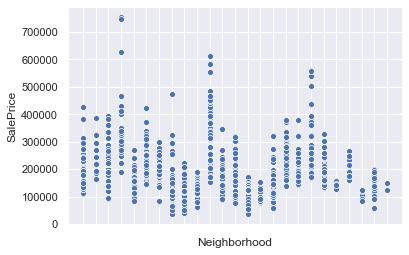

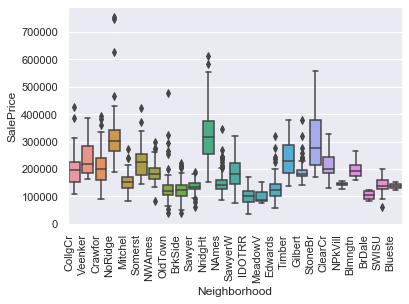

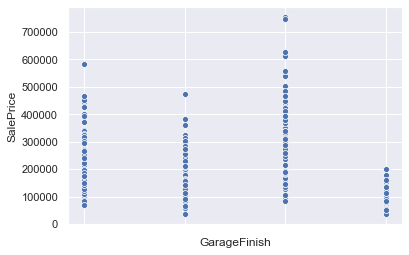

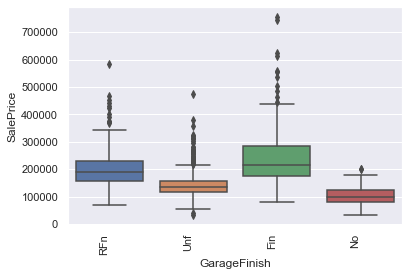

In [33]:
# Look at scatter plot and box plots against SalePrice

for col in df_cat_interest.index.tolist():
    plt.figure()
    ax1 = sns.scatterplot(x=col, y=df['SalePrice'], data=df)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.figure()
    ax2 = sns.boxplot(x=col, y=df['SalePrice'], data=df)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')

### Skip:  Look for cross correlation in top candidates

In [34]:
# Filter down the data set
x_col_list = df_cat_interest.index.tolist()

col_list = x_col_list
df_cat_interest_full = df[col_list]

df_cat_interest_full.head()

,Neighborhood,GarageFinish
Id,,
1,CollgCr,RFn
2,Veenker,RFn
3,CollgCr,RFn
4,Crawfor,Unf
5,NoRidge,RFn


In [35]:
# SKIP:  Get the correlation numbers

# Aside, pandas .corr doesn't seem to work for categorical

In [36]:
# SKIP:  Eliminate cross correlation between categorical variables

In [37]:
# SKIP:  Eliminate cross correlatino across categorical and non-categorical

Takeways:

* Since I've only got two categorical variables, I'm going to use both of them in later reviews
* I'm skipping the look for cross-correlation between categorical
* I'm skipping the look for cross-correlation across categorical and non-categorical

### State my final categorical variables

In [38]:
cat_final_list = df_cat_interest.index.to_list()
cat_final_list = pd.Series(cat_final_list)
cat_final_list

0    Neighborhood
1    GarageFinish
dtype: object

In [39]:
### Run a preview model with these variables

# results_5 = ols('SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + C(GarageType)', data=df).fit()
# results_5.summary()

## Save my lists of key variables


In [40]:
# Save as a picked dataframe

nocat_final_list.to_pickle("../sb_cap1_data/list_targets_nocat.pickle")
cat_final_list.to_pickle("../sb_cap1_data/list_targets_cat.pickle")

In [41]:
# # Check 

# temp = pd.read_pickle("../sb_cap1_data/list_targets_nocat.pickle")
# temp

## Conclusions (from v1 of this notebook)

For non-categorical variables, I found:

* 12 statistically-significant features with correlations (i.e., Pearson's r) higher than 50%
* Meaningful scatterplots
* High cross-correlations, unfortunately. The cross-correlation measures were sometimes 75% or more. There's real overlap across certain measures of quality (e.g., kitchen quality and exterior quality), of space (e.g., garage square footage and the number of cars), and of key properties (e.g., the number of rooms and number of bathrooms).
* Five top variables: These included overall quality, living area, garage size in cars, count of full baths, and fireplace quality.
* A disappointing preview of a regression: The adjusted r-squared of my 5-feature equation was less than the r-squared of the top individual feature's regression. While I've not yet analyzed whether the assumptions of linear regression are met, I suspect that multicollinearity is a big problem.
* Also, I found that when I repeated much of the above analysis after dropping 8 key outliers, the conclusions don't change.

For the categorical variables, I found:

* Only four statistically-significant features with 'barely any' correlation to sale price (aka, r-squared from my one-way ANOVA of more than .20%)
* Hard-to-interpret scatter plots and box plots of these categorical variables
* Surprisingly good regression preview: The adjusted r-squared of my statistically-significant model with these four categorical variables was more than 60%.